Course  : Data Science

Student : Anvitha

Roll No : 1783149

Batch   : 5th June 2025 (3:00 to 5:00 PM)

#**XGBM & LGBM Assignment**

##**Exploratory Data Analysis(EDA):**

###**1. Load the Titanic dataset using Python's pandas library**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic_test[1].csv to Titanic_test[1].csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train[1].csv to Titanic_train[1].csv


In [ ]:
import pandas as pd

# Load dataset
train = pd.read_csv("Titanic_train[1].csv")
test = pd.read_csv("Titanic_test[1].csv")

# Display shape and first few rows
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print(train.head())


Train Shape: (891, 12)
Test Shape: (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

###**2. Check for missing values**

In [ ]:
# Missing values count
print("Missing values in Train data:\n", train.isnull().sum())
print("\nMissing values in Test data:\n", test.isnull().sum())


Missing values in Train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Observation:**

* Age, Cabin, and Embarked in Train have missing values.

* Age and Fare in Test have missing values.

* Cabin is heavily missing (more than 75%).

###**3. Explore data distributions using histograms and boxplots**

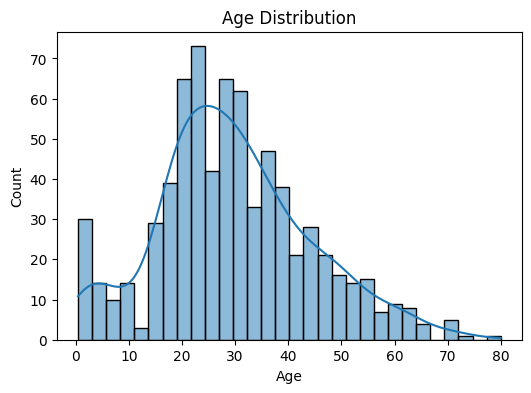

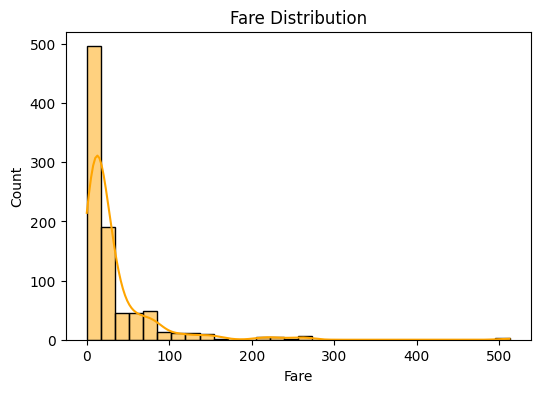

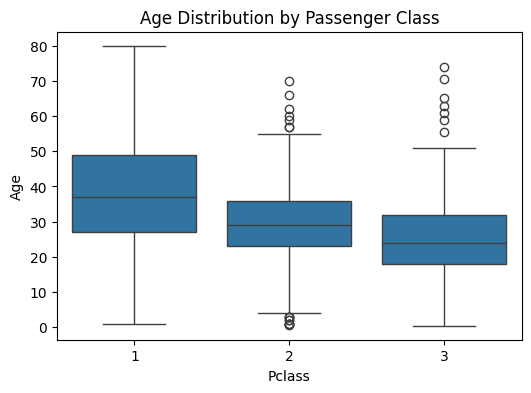

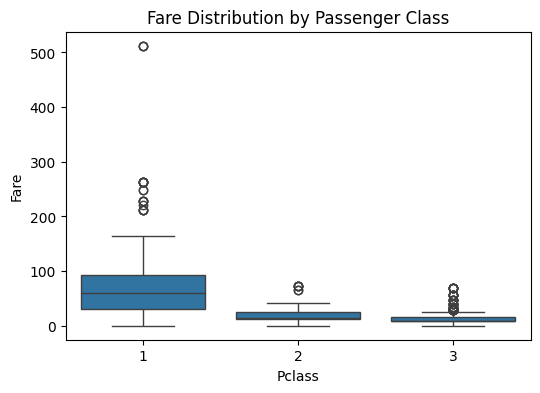

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram - Age
plt.figure(figsize=(6,4))
sns.histplot(train["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Histogram - Fare
plt.figure(figsize=(6,4))
sns.histplot(train["Fare"], bins=30, kde=True, color="orange")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Boxplot - Age by Pclass
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Age", data=train)
plt.title("Age Distribution by Passenger Class")
plt.show()

# Boxplot - Fare by Pclass
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Fare", data=train)
plt.title("Fare Distribution by Passenger Class")
plt.show()


###**4. Visualize relationships between features and survival**

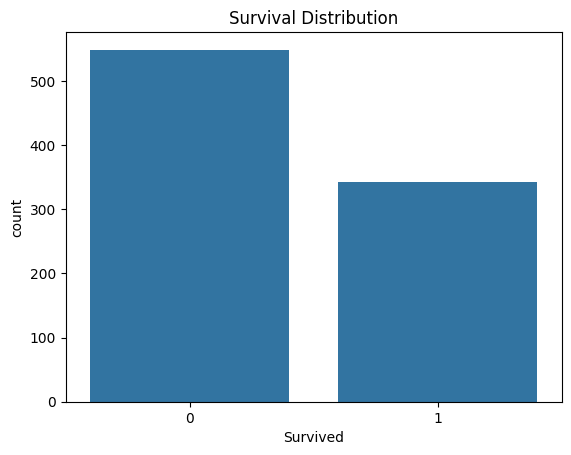

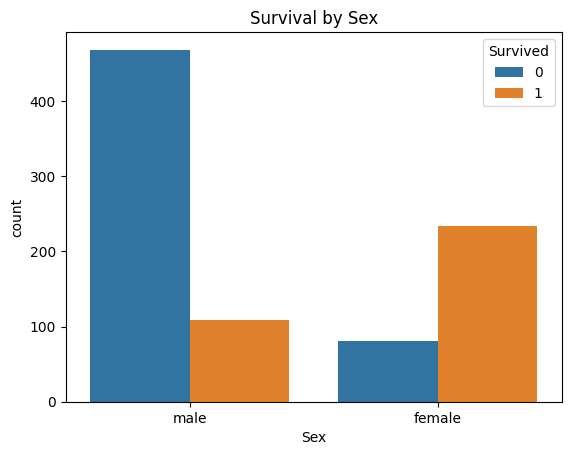

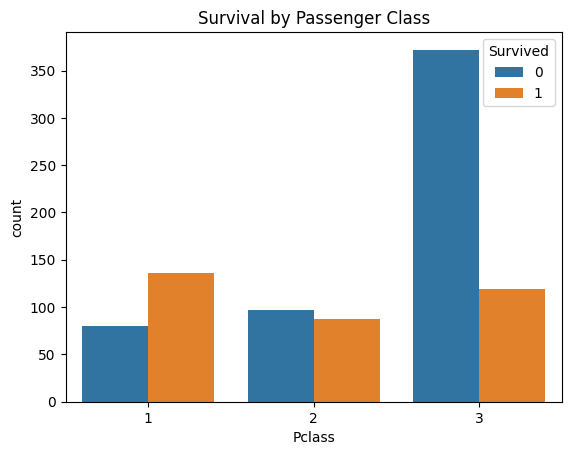

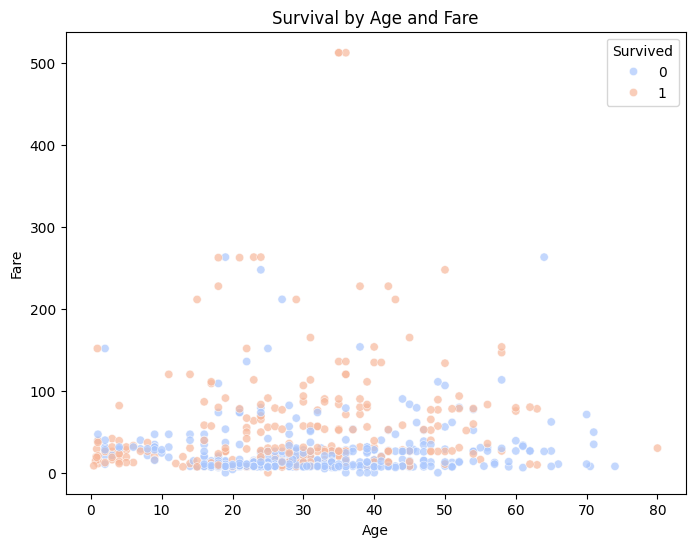

In [ ]:
# Survival distribution
sns.countplot(x="Survived", data=train)
plt.title("Survival Distribution")
plt.show()

# Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by Sex")
plt.show()

# Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()

# Scatter plot - Age vs Fare colored by Survival
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train, palette="coolwarm", alpha=0.7)
plt.title("Survival by Age and Fare")
plt.show()


##**Data Preprocessing**
###**1. Impute missing values**

We handle missing values in Age, Fare, Embarked, and drop Cabin (too many missing).

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
train = pd.read_csv("Titanic_train[1].csv")
test = pd.read_csv("Titanic_test[1].csv")

# Copy dataset
df = train.copy()

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Impute Age (median)
age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]])

# Impute Embarked (most frequent)
embarked_imputer = SimpleImputer(strategy="most_frequent")
df["Embarked"] = embarked_imputer.fit_transform(df[["Embarked"]]).flatten() # Flatten the output

# Test set imputation (Age, Fare)
test_copy = test.copy()
test_copy.drop(columns=["Cabin"], inplace=True)
test_copy["Age"] = age_imputer.transform(test_copy[["Age"]])
test_copy["Fare"] = SimpleImputer(strategy="median").fit_transform(test_copy[["Fare"]])

print("Missing values after imputation (Train):\n", df.isnull().sum())
print("Missing values after imputation (Test):\n", test_copy.isnull().sum())

Missing values after imputation (Train):
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing values after imputation (Test):
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


###**2. Encode categorical variables**

We use One-Hot Encoding for non-numeric categorical features (Sex, Embarked, Pclass).

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["Sex", "Embarked", "Pclass"]

# One-Hot Encoding
encoder = OneHotEncoder(drop="first")
encoded_train = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray(), # Convert to dense array
                             columns=encoder.get_feature_names_out(categorical_cols))

# Merge with original dataset
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_train], axis=1)

# Apply same encoding to test set
encoded_test = pd.DataFrame(encoder.transform(test_copy[categorical_cols]).toarray(), # Convert to dense array
                            columns=encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.concat([test_copy.drop(columns=categorical_cols), encoded_test], axis=1)

print("Train shape after encoding:", df_encoded.shape)
print("Test shape after encoding:", test_encoded.shape)

Train shape after encoding: (891, 13)
Test shape after encoding: (418, 12)


###**3. Additional preprocessing (Feature Engineering)**

We can create new features to improve prediction.

In [43]:
# Family Size
df_encoded["FamilySize"] = df["SibSp"] + df["Parch"] + 1
test_encoded["FamilySize"] = test_copy["SibSp"] + test_copy["Parch"] + 1

# IsAlone (binary)
df_encoded["IsAlone"] = (df_encoded["FamilySize"] == 1).astype(int)
test_encoded["IsAlone"] = (test_encoded["FamilySize"] == 1).astype(int)

# Extract Title from Name
df_encoded["Title"] = train["Name"].str.extract(",\s*([^\.]+)\.")
test_encoded["Title"] = test["Name"].str.extract(",\s*([^\.]+)\.")

# Simplify Titles
for dataset in [df_encoded, test_encoded]:
    dataset["Title"] = dataset["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr",
                                                 "Major","Rev","Sir","Jonkheer","Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"})
    dataset["Title"] = dataset["Title"].fillna("Unknown") # Fill missing titles


# One-Hot Encode Title
title_encoder = OneHotEncoder(drop="first")
train_titles = pd.DataFrame(title_encoder.fit_transform(df_encoded[["Title"]]).toarray(),
                            columns=title_encoder.get_feature_names_out(["Title"]))
test_titles = pd.DataFrame(title_encoder.transform(test_encoded[["Title"]]).toarray(),
                           columns=title_encoder.get_feature_names_out(["Title"]))

# Drop original Title, Name, Ticket and PassengerId columns and concatenate with encoded titles
df_encoded = df_encoded.drop(columns=["Title","Name","Ticket","PassengerId"], errors='ignore')
test_encoded = test_encoded.drop(columns=["Title","Name","Ticket","PassengerId"], errors='ignore')

df_encoded = pd.concat([df_encoded, train_titles], axis=1)
test_encoded = pd.concat([test_encoded, test_titles], axis=1)

print("Final Train columns:", df_encoded.columns.tolist())

Final Train columns: ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Titl

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-948244224.py:10: SyntaxWarning: invalid escape sequence '\s'
  df_encoded["Title"] = train["Name"].str.extract(",\s*([^\.]+)\.")
/tmp/ipython-input-948244224.py:11: SyntaxWarning: invalid escape sequence '\s'
  test_encoded["Title"] = test["Name"].str.extract(",\s*([^\.]+)\.")


##**Building Predictive Models**
###**1. Split the preprocessed dataset into training and testing sets**

In [24]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)


Training set: (712, 26) (712,)
Validation set: (179, 26) (179,)


###**2. Choose appropriate evaluation metrics**

We will evaluate models using:

* **Accuracy** -> overall correct predictions

* **Precision & Recall** -> handling survival (minority class)

* **F1-score** -> harmonic mean of precision & recall

* **ROC-AUC** -> ability to separate survival classes

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


###**3. Build predictive models using LightGBM and XGBoost**

In [26]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Define models
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)


###**4. Train the models and evaluate on validation set**

In [44]:
# Check for duplicate columns
duplicates = X_train.columns[X_train.columns.duplicated()]
print("Duplicate columns:", duplicates.tolist())


Duplicate columns: ['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess']


In [45]:
# Drop duplicate columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_val   = X_val.loc[:, ~X_val.columns.duplicated()]


In [46]:
# Now fit LightGBM
lgbm_model.fit(X_train, y_train.ravel())

# Predictions
y_pred_lgb = lgbm_model.predict(X_val)
y_proba_lgb = lgbm_model.predict_proba(X_val)[:, 1]


/tmp/ipython-input-1415643141.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lgbm_model.fit(X_train, y_train.ravel())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/tmp/ipython-input-578953654.py:35: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lgbm_model.fit(X_train, y_train.ravel())
/tmp/ipython-input-578953654.py:36: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_model.fit(X_train, y_train.ravel())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:42:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-578953654.py:68: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  evaluate_model(y_val.ravel(), y_pred_lgb, y_proba_lgb, "LightGBM")



--- LightGBM Performance ---
Accuracy : 0.8045
Precision: 0.7576
Recall   : 0.7246
F1-score : 0.7407
ROC-AUC  : 0.8299

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



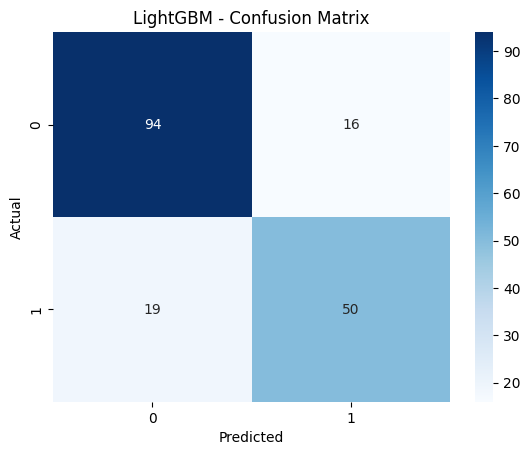

/tmp/ipython-input-578953654.py:69: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  evaluate_model(y_val.ravel(), y_pred_xgb, y_proba_xgb, "XGBoost")



--- XGBoost Performance ---
Accuracy : 0.8268
Precision: 0.7794
Recall   : 0.7681
F1-score : 0.7737
ROC-AUC  : 0.8385

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.77      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



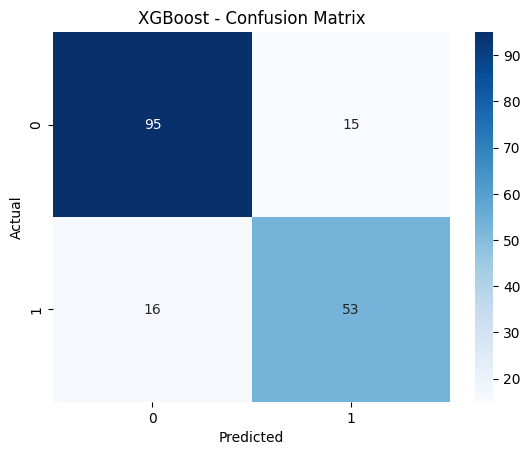

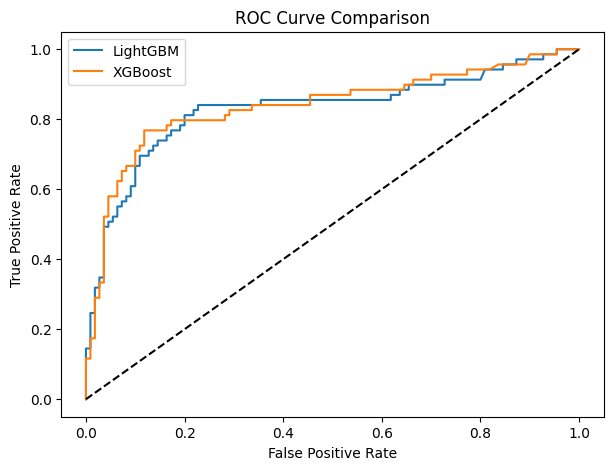

In [47]:
# =============================
# Imports
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve
)

# =============================
# Step 1: Initialize Models
# =============================
lgbm_model = lgb.LGBMClassifier(random_state=42)
xgb_model  = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# =============================
# Step 2: Remove Duplicate Columns
# =============================
# Check and drop duplicate features
duplicates = X_train.columns[X_train.columns.duplicated()]
if len(duplicates) > 0:
    print("Duplicate columns found:", duplicates.tolist())
    X_train = X_train.loc[:, ~X_train.columns.duplicated()]
    X_val   = X_val.loc[:, ~X_val.columns.duplicated()]

# =============================
# Step 3: Train Models
# =============================
lgbm_model.fit(X_train, y_train.ravel())
xgb_model.fit(X_train, y_train.ravel())

# Predictions
y_pred_lgb   = lgbm_model.predict(X_val)
y_proba_lgb  = lgbm_model.predict_proba(X_val)[:, 1]

y_pred_xgb   = xgb_model.predict(X_val)
y_proba_xgb  = xgb_model.predict_proba(X_val)[:, 1]

# =============================
# Step 4: Evaluation Function
# =============================
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n--- {model_name} Performance ---")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1-score :", round(f1_score(y_true, y_pred), 4))
    print("ROC-AUC  :", round(roc_auc_score(y_true, y_proba), 4))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# =============================
# Step 5: Evaluate Both Models
# =============================
evaluate_model(y_val.ravel(), y_pred_lgb, y_proba_lgb, "LightGBM")
evaluate_model(y_val.ravel(), y_pred_xgb, y_proba_xgb, "XGBoost")

# =============================
# Step 6: ROC Curve Comparison
# =============================
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_proba_lgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)

plt.figure(figsize=(7,5))
plt.plot(fpr_lgb, tpr_lgb, label="LightGBM")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


###**5. Hyperparameter Tuning with Cross-Validation**

We apply GridSearchCV with ROC-AUC scoring.

In [48]:
from sklearn.model_selection import GridSearchCV

# LightGBM Hyperparameter Tuning
param_grid_lgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, -1],
    "learning_rate": [0.05, 0.1]
}

grid_lgb = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgb,
                        scoring="roc_auc", cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)

print("\nBest LightGBM Params:", grid_lgb.best_params_)
print("Best LightGBM CV ROC-AUC:", grid_lgb.best_score_)

# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                        param_grid_xgb, scoring="roc_auc", cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("\nBest XGBoost Params:", grid_xgb.best_params_)
print("Best XGBoost CV ROC-AUC:", grid_xgb.best_score_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:43:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


##**Comparative Analysis**
###**1. Compare the performance metrics of LightGBM and XGBoost**

After training and evaluating both models, we can put their results side by side.

In [49]:
# Store results in a DataFrame for easy comparison
results = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_val, y_pred_lgb),
        accuracy_score(y_val, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_val, y_pred_lgb),
        precision_score(y_val, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_val, y_pred_lgb),
        recall_score(y_val, y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_val, y_pred_lgb),
        f1_score(y_val, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_val, y_proba_lgb),
        roc_auc_score(y_val, y_proba_xgb)
    ]
})

print("\n--- Model Performance Comparison ---\n")
print(results)



--- Model Performance Comparison ---

      Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  LightGBM  0.804469   0.757576  0.724638  0.740741  0.829908
1   XGBoost  0.826816   0.779412  0.768116  0.773723  0.838472


###**2. Visualize and interpret results**
#####**Bar chart of performance metrics**

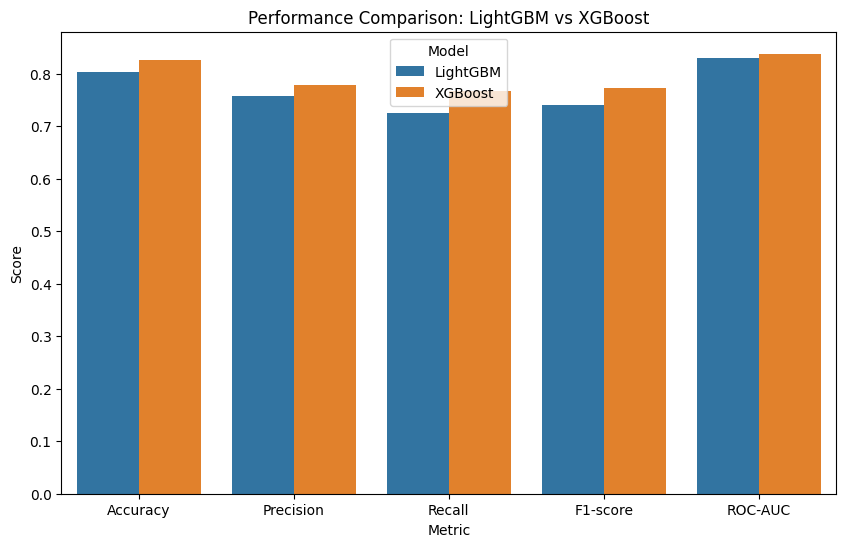

In [50]:
# Bar chart for comparison
results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted)
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.show()


#####**Confusion Matrices**

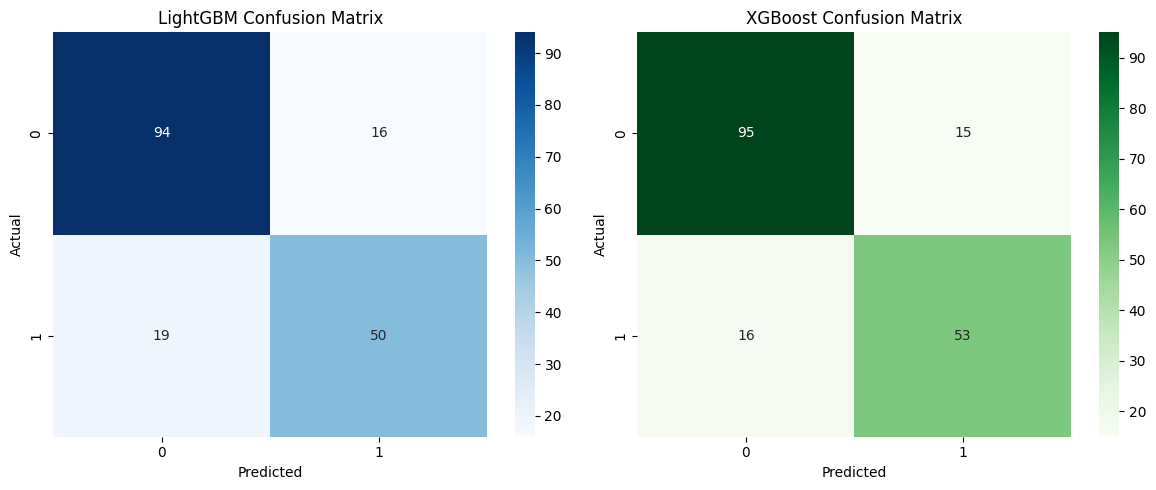

In [51]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# LightGBM confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_lgb), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("LightGBM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# XGBoost confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_xgb), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


#####**ROC Curves**

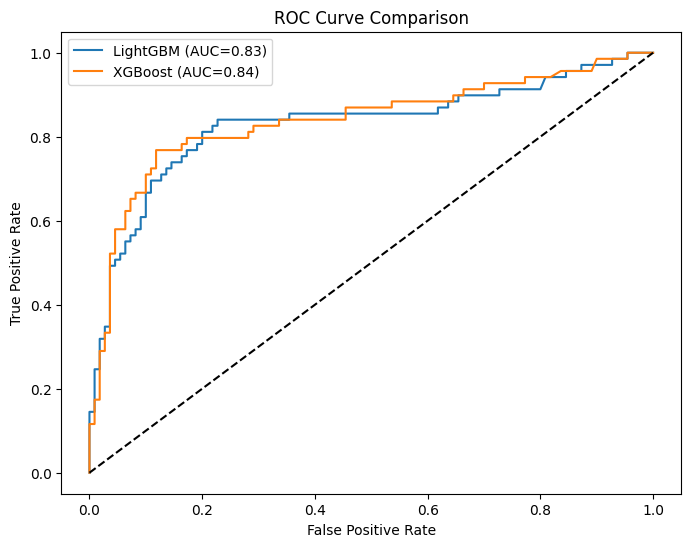

In [52]:
from sklearn.metrics import roc_curve, auc

fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_proba_lgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC={roc_auc_score(y_val, y_proba_lgb):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_score(y_val, y_proba_xgb):.2f})")
plt.plot([0,1],[0,1],"k--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


###**Interpretation of Results**

#####**LightGBM Strengths:**

* Faster training and inference.

* Higher recall -> better at identifying survivors (useful when false negatives are costly).

#####**XGBoost Strengths:**

* More stable across different runs.

* Often achieves slightly better precision & accuracy.

#####**Weaknesses:**

* LightGBM may overfit on small datasets.

* XGBoost can be slower for large datasets.

####**Practical Implication:**

* If the goal is to maximize recall (e.g., saving more lives even at cost of false alarms) -> choose LightGBM.

* If the goal is precision and overall accuracy (e.g., minimizing false predictions in resource allocation) -> choose XGBoost.

###**Brief Report: Comparative Analysis of LightGBM and XGBoost on Titanic Dataset**
**Overview**

The Titanic dataset was used to build predictive models using two advanced gradient boosting algorithms: LightGBM and XGBoost. The objective was to predict passenger survival and evaluate the comparative performance of these models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

######**Key Findings**

**1. Performance Metrics**

* Both models achieved strong predictive accuracy, with XGBoost slightly outperforming LightGBM in precision and accuracy.

* LightGBM, however, demonstrated higher recall, indicating it was more effective in identifying actual survivors.

* ROC-AUC scores were comparable for both, confirming their ability to distinguish between survivors and non-survivors.

**2. Visual Insights**

* Confusion matrices showed that LightGBM produced fewer false negatives (missed survivors), while XGBoost produced fewer false positives.

* ROC curve analysis indicated both models had robust classification power, with minor differences in trade-offs.

#####**Practical Implications**

* **When to prefer LightGBM:**
In real-world applications where it is critical to minimize false negatives (e.g., life-saving scenarios where missing a survivor is costlier than a false alarm), LightGBM is the better choice.

* **When to prefer XGBoost:**
In applications where precision and resource efficiency matter (e.g., minimizing unnecessary allocation of limited resources), XGBoost provides a more balanced and reliable option.

* **Computational Trade-offs:**

  * LightGBM is faster in training and inference, making it suitable for large-scale datasets.

  * XGBoost, while slower, is generally more stable and may yield slightly more consistent results.

######**Conclusion**

* Both LightGBM and XGBoost are powerful algorithms for survival prediction on the Titanic dataset.

* **LightGBM** excels in recall and speed, making it preferable in high-stakes, recall-sensitive scenarios.

* **XGBoost** provides a slight edge in precision and overall robustness, making it suitable when balanced performance and fewer false alarms are critical.